In [ ]:
import matplotlib.pyplot as plt
import pandas as pd #probs not needed but i keep it here for now
from collections import Counter # Taken from stackoverflow as it didnt work as intended in the beginning.

### I did it in one file, i hope thats correct :S ####

Count for seq 1:
A: 17, T: 7, C: 8, G: 2



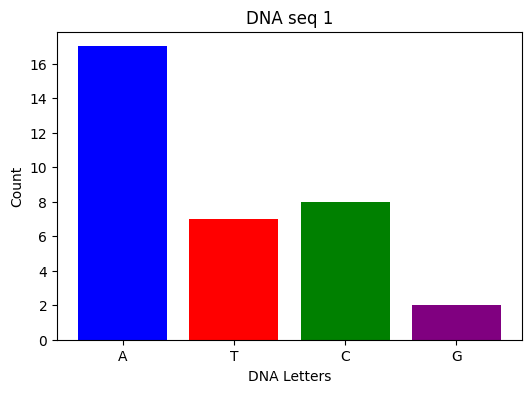

Count for seq 2:
A: 3, T: 7, C: 4, G: 10



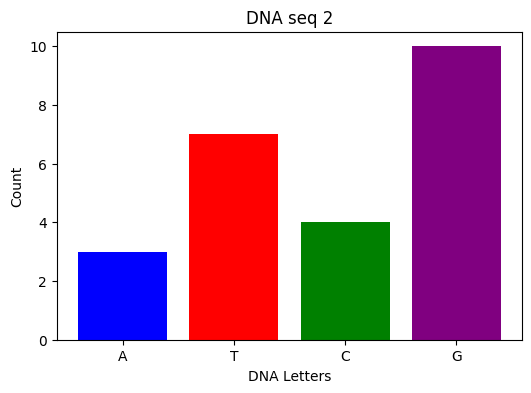

Count for seq 3:
A: 36, T: 19, C: 34, G: 21



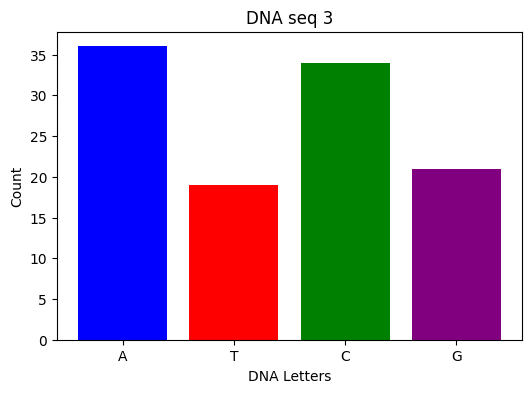

Count for seq 4:
A: 17, T: 12, C: 15, G: 20



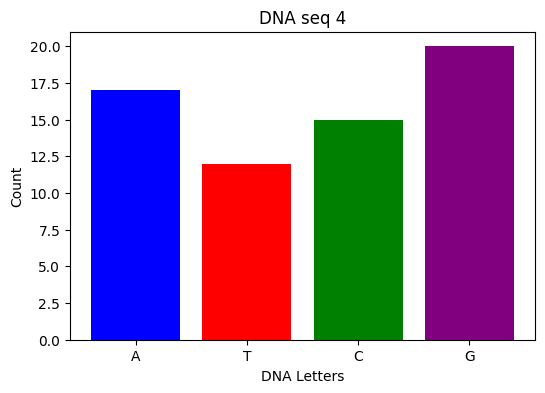

In [ ]:
def open_and_extract_data_from_file():
    #opens the file with the seq, reads the seq, closes the file after, as a dict
    sequences = []  # List to store seq
    current_seq = None  # Temp dict seq

    with open('dna_raw_complicated.txt', 'r') as dna_file:
        for line in dna_file:
            line = line.strip().upper()  # take away white spaces etc

            if line.startswith('>'):
                # new seq, saves last if needed
                if current_seq:
                    sequences.append(current_seq)
                
                # new dict for new seq
                current_seq = {"id": line[4:], "sequence": ""}
            elif current_seq:
                # add seq to dict
                current_seq["sequence"] += line

        # adding last seq
        if current_seq:
            sequences.append(current_seq)

    return sequences # biig return here. gives you the correct seq

def count_letters_in_sequence(sequence_string):
   #Calculates the numbers, adding them to dict.
    letter_count = Counter(sequence_string)
    ordered_letters = ['A', 'T', 'C', 'G']  # keeps the letters in correct order. Btw this was a pain in the ass to figure out, shoutout to Stackoverflow.
    return {letter: letter_count[letter] for letter in ordered_letters if letter in letter_count}

def print_letters_per_seq(sequences):
    # loops the seq, counts the letters, kinda like the function above.
    for seq in sequences:
        print(f"Count for seq {seq['id']}:")
        letter_counts = count_letters_in_sequence(seq["sequence"])
        
        print(", ".join(f"{key}: {value}" for key, value in letter_counts.items()))
        print()
        
        graph_letter_frequencies(seq["id"], letter_counts)

def graph_letter_frequencies(seq_id, letter_counts):
    #does the graph for the function
    plt.figure(figsize=(6, 4))
    plt.bar(letter_counts.keys(), letter_counts.values(), color=['blue', 'red', 'green', 'purple'])
    plt.xlabel("DNA Letters")
    plt.ylabel("Count")
    plt.title(f"DNA seq {seq_id}")
    plt.show()

### main ### 
if __name__ == "__main__":
    sequences = open_and_extract_data_from_file()
    print_letters_per_seq(sequences)

## i just went straight for a method working with task 1 and 2 at the same time and worked more with the complicated code instead, it just made more sense to me.
# i mainly used google and stackoverflow had some good examples for this. And repeated videos of pyton fundamentals 4-5 and some of the stuff we did in code_along
# also asked my classmates about some of the functions and how they did theirs. But thats it for source. I'll take credit for it all.